<a href="https://colab.research.google.com/github/javi-code/lab_sis_420/blob/master/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [880]:
import os
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Librerias para graficar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [881]:
#  LAB 02, 28/08/23
#  https://www.kaggle.com/datasets/mohammadtalib786/pubg-stats-dataset
##

datos = pd.read_csv('/content/Pubg_Stats.csv')
#datos.head()
datos.info() # Muestra la informacion, para verificar que todos los datos esten completos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         221 non-null    int64 
 1   Player_Name        221 non-null    object
 2   Matches_Played     221 non-null    int64 
 3   Kills              221 non-null    int64 
 4   Deaths             221 non-null    int64 
 5   Assists            221 non-null    int64 
 6   Damage_Dealt       221 non-null    int64 
 7   Headshots          221 non-null    int64 
 8   Wins               221 non-null    int64 
 9   Top_10s            221 non-null    int64 
 10  Revives            221 non-null    int64 
 11  Distance_Traveled  221 non-null    int64 
 12  Weapons_Used       221 non-null    int64 
 13  Time_Survived      221 non-null    int64 
 14  Rank               221 non-null    object
dtypes: int64(13), object(2)
memory usage: 26.0+ KB


In [882]:
# datos.drop(columns=datos.columns[0], axis=1)
datos.drop(columns=datos.columns[0], axis=1, inplace=True)
datos.drop(columns=datos.columns[0], axis=1, inplace=True)
datos.drop('Rank', axis=1)

# cols categoricas (object), para convertir a numericas
columnas_categoricas = datos.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
  le = LabelEncoder()
  datos[columna] = le.fit_transform(datos[columna])

In [883]:
# ordenamos las columnas y Leemos los datos de cols
col = datos.pop("Wins")
datos.insert(len(datos.columns), "Wins", col)

dataCol = datos.values
X = dataCol[:, :11]
y = dataCol[:, 12]
m = y.size

x_normal  = X.copy() # para usar en la normal
print(X)
print('='*25)
print(y)

[[  250   587   143 ... 72560    12 28976]
 [  312   823   218 ... 89042    15 33652]
 [  186   492    84 ... 60924    10 21764]
 ...
 [  206   553   117 ... 58789    10 24579]
 [  220   597   144 ... 60978    11 25679]
 [  225   624   149 ... 61789    11 25967]]
[32 42 28 55 20 35 26 18 47 23 27 41 18 44 36 25 39 31 22 28 37 24 40 32
 29 35 37 23 31 36 27 41 18 44 36 25 39 31 22 28 37 24 40 32 29 35 37 23
 31 36 27 41 18 44 36 25 39 31 22 28 37 24 40 32 29 35 37 23 31 36 27 41
 18 44 36 25 39 31 22 28 37 24 40 32 29 35 37 23 31 36 39 30 37 21 48 25
 29 36 22 34 28 33 35 31 30 32 25 36 28 30 35 37 34 40 29 32 26 34 24 35
 29 36 38 28 33 28 34 35 31 29 32 26 36 28 30 34 37 38 29 30 34 27 35 29
 30 33 37 37 29 30 28 34 35 31 29 32 26 36 28 30 34 37 38 29 30 34 27 35
 29 30 33 37 37 29 30 28 34 35 31 29 32 26 36 28 30 34 37 38 29 30 34 27
 35 29 30 33 37 37 29 30 31 33 35 30 29 32 26 34 29 30 35 38 29 30 33 36
 39 27 29 32 33]


In [884]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [885]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print('___Media calculada___' )
print( mu)
print('___Desviación estandar calculada___')
print(sigma)
print(X_norm)

___Media calculada___
[2.34624434e+02 6.12674208e+02 1.42579186e+02 9.26153846e+01
 1.48010045e+04 2.07361991e+02 1.10357466e+02 5.43303167e+01
 6.14493167e+04 1.08597285e+01 2.54444208e+04]
___Desviación estandar calculada___
[3.70942195e+01 8.91089257e+01 3.28080848e+01 2.13745215e+01
 1.89863778e+03 2.97084659e+01 2.37407529e+01 1.04125070e+01
 5.76244758e+03 1.31584768e+00 2.69316499e+03]
[[ 0.41450031 -0.28812162  0.01282655 ...  1.92811876  0.866568
   1.31131186]
 [ 2.08591976  2.36032238  2.29884844 ...  4.7883617   3.14646713
   3.047559  ]
 [-1.31083589 -1.35423255 -1.78551067 ... -0.09116209 -0.65336476
  -1.3665783 ]
 ...
 [-0.77166833 -0.66967711 -0.77966104 ... -0.46166437 -0.65336476
  -0.32133969]
 [-0.39425103 -0.17589942  0.04330684 ... -0.08179107  0.10660162
   0.08710168]
 [-0.25945914  0.12710053  0.1957083  ...  0.05894774  0.10660162
   0.19403905]]


In [886]:
# Añade el termino de interseccion a X (cols de 1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [887]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]     # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [888]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]        # numero de ejemplos de entrenamiento
    theta = theta.copy()  # realiza una copia de theta
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente:: 
[31.88531308  0.63721679  0.80365603  0.27921936  0.308857    0.82823619
  0.66427037  1.06336324  0.58292388 -0.13913586  0.19006622  0.59899523]

El valor predecido es "por descenso por el gradiente"::  24.502574727867902




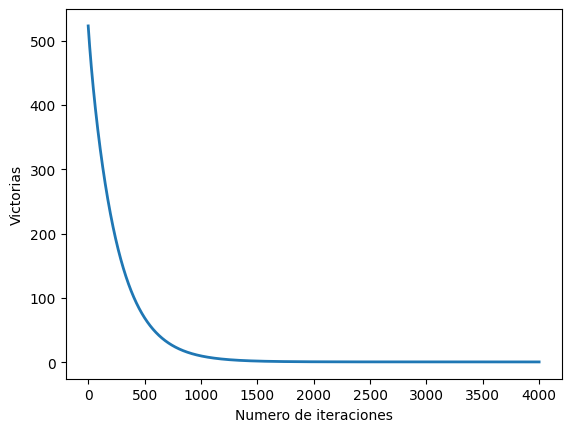

In [889]:
# Elegimos el valor mas adecuado para ALPHA
alpha = 0.002
num_iters = 4000

# Ejecutamos el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia de los wins
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Victorias')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente:: ')
print( str(theta))


X_array = [1, 221, 498, 91, 68, 15180, 132, 80, 78, 44000, 18, 1983]

X_array[1:12] = (X_array[1:12] - mu) / sigma
wins = np.dot(X_array, theta)

print('\nEl valor predecido es "por descenso por el gradiente":: ', wins)
print('\n')

In [890]:
#
# Ecuacion de la norma
#

def calcularEcuacionNormal(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
  return theta

In [891]:
X_ren = np.concatenate([np.ones((m, 1)), x_normal], axis=1)
theta = calcularEcuacionNormal(X_ren, y)

In [892]:
X_array = [1, 221, 498, 91, 68, 15180, 132, 80, 78, 44000, 18, 1983]
wins = np.dot(X_array, theta)
print(f"Valores de theta son:: ", theta)
print('\n')
print('Victorias: usando la ecuación de la normal:: ', wins)

Valores de theta son::  [ 4.61932422e+00 -6.21184066e-03  3.05967549e-02 -2.52833493e-02
  2.08449290e-02  3.37134603e-04  1.54939536e-03  1.68087954e-01
 -1.05739075e-03 -3.85548790e-04 -1.61372549e-02  4.60845848e-04]


Victorias: usando la ecuación de la normal::  19.946385084139266
